In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from darts import TimeSeries
from darts.models import FFT, AutoARIMA, ExponentialSmoothing, Theta
from darts.metrics import mae
from darts.utils.missing_values import fill_missing_values
from darts.datasets import TemperatureDataset, AirPassengersDataset, EnergyDataset
from asset import Asset

In [18]:
ASSETS_DIR = Path("data/Bundle2/")
ASSETS = [Asset(asset_path) for asset_path in ASSETS_DIR.iterdir() if asset_path.suffix == ".txt"]
ASSETS = sorted(ASSETS, key=lambda asset: ASSETS_ORDER.index(asset.name))

In [42]:
def get_expected_return_FFT(asset: Asset, plot: bool = False) -> float:
    data = asset.data_points
    
    df = pd.DataFrame({"y": data, "ds": pd.date_range("2023-01-01", periods=len(data), freq="D")})
    train = TimeSeries.from_series(df.y)
    model = FFT(nr_freqs_to_keep=50, required_matches=set())
    model.fit(train)


    forecast = model.predict(100)

    if plot:
        train.plot()
        forecast.plot()
        plt.show()


    return forecast[-1]

def format_to_range(expected_results: np.array):
    # Format results to range [-1, 1]
    min_val = min(expected_results)
    max_val = max(expected_results)

    return 2 * (expected_results - min_val) / (max_val - min_val) - 1

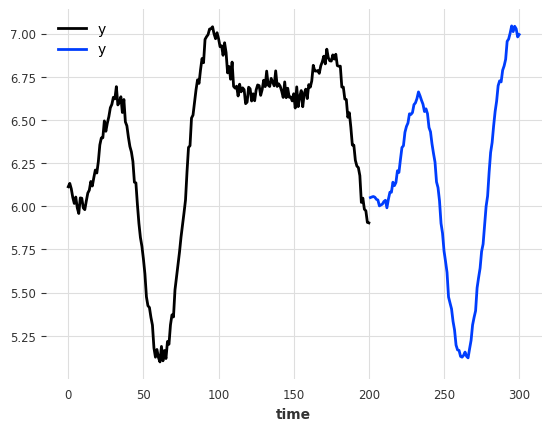

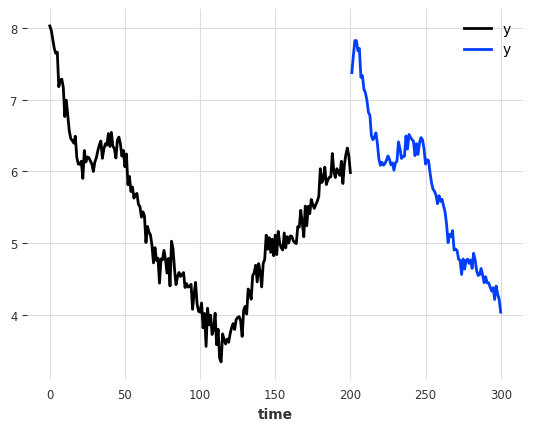

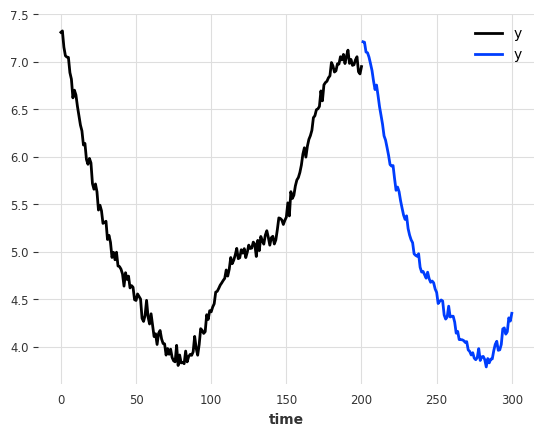

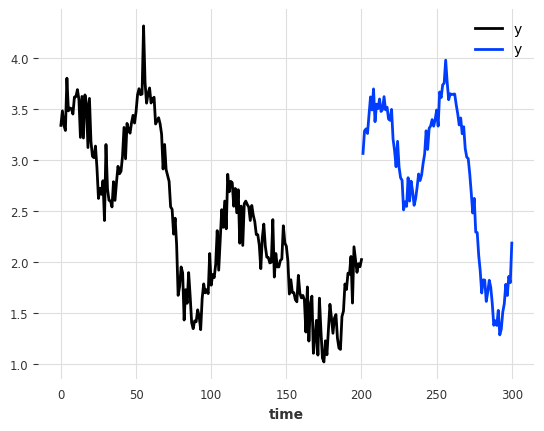

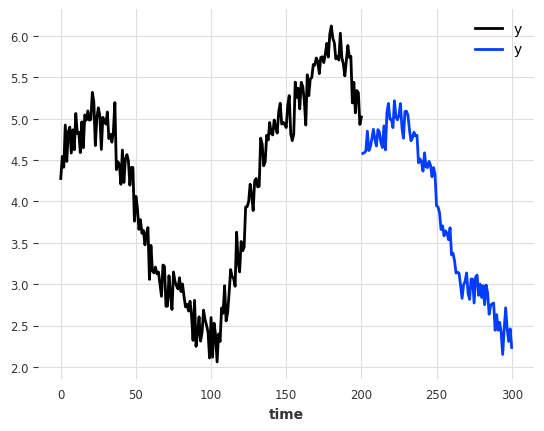

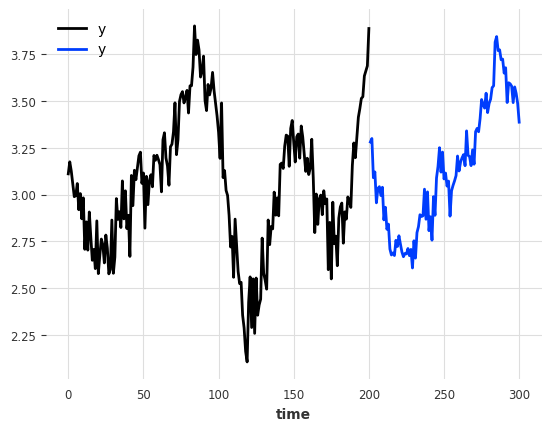

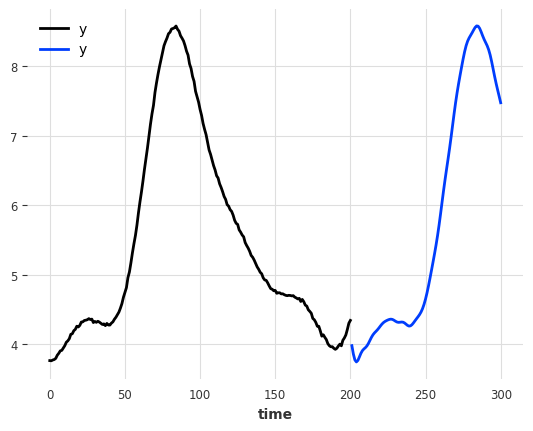

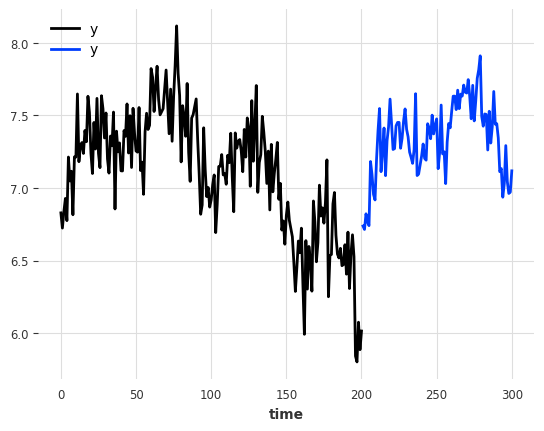

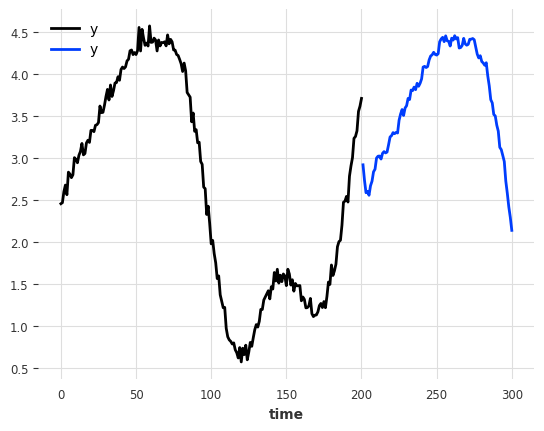

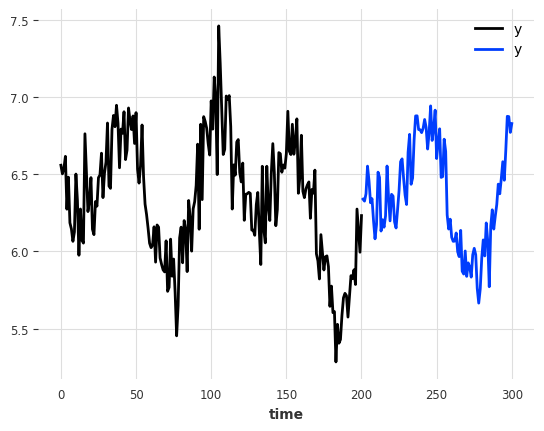

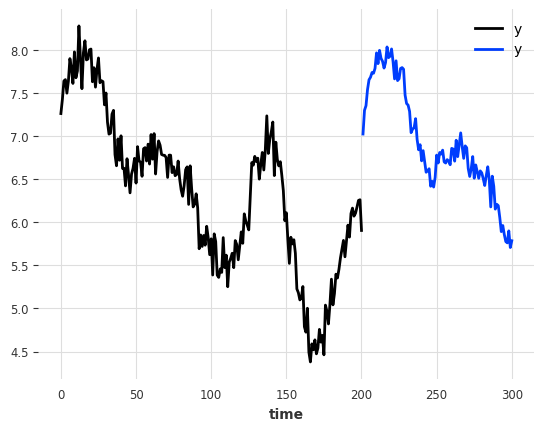

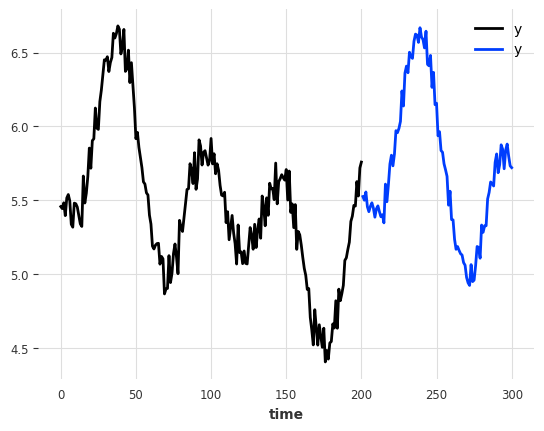

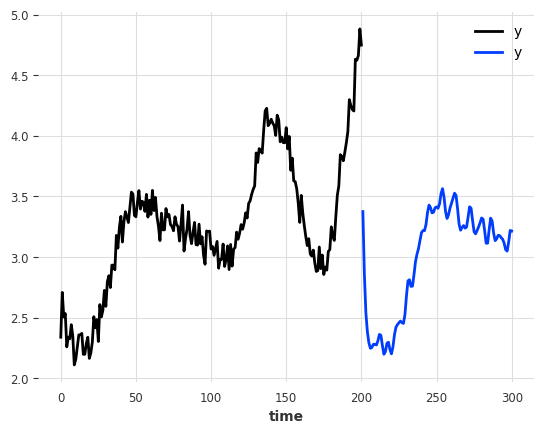

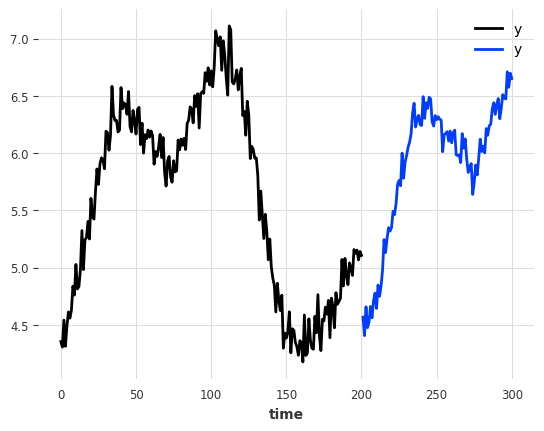

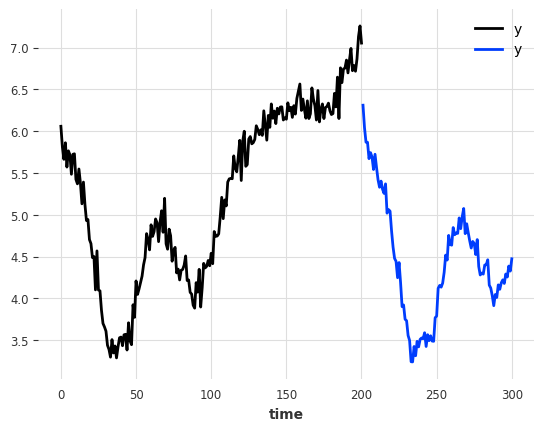

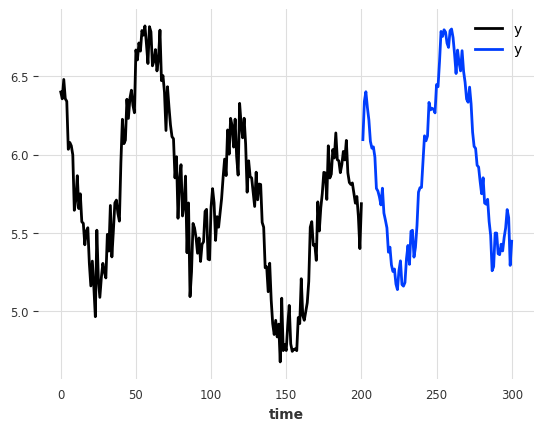

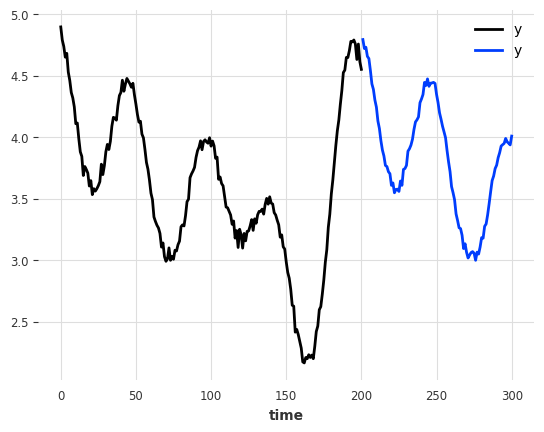

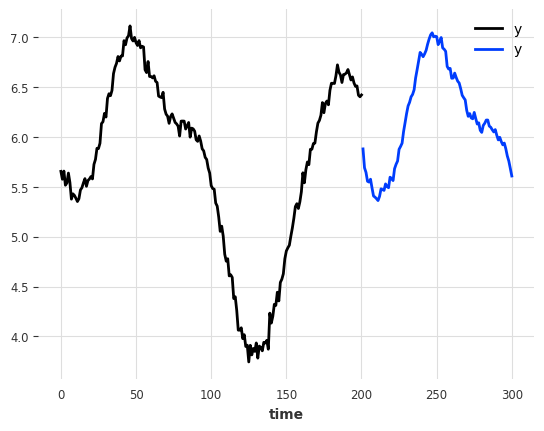

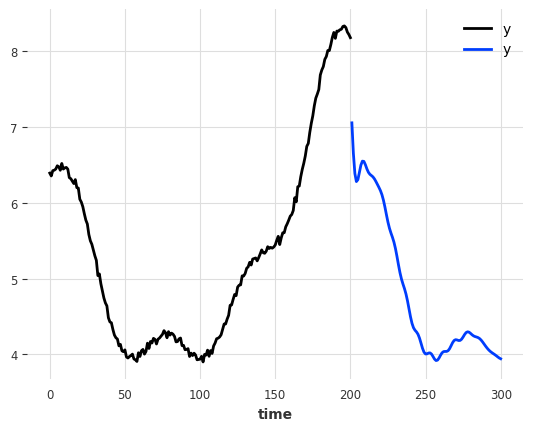

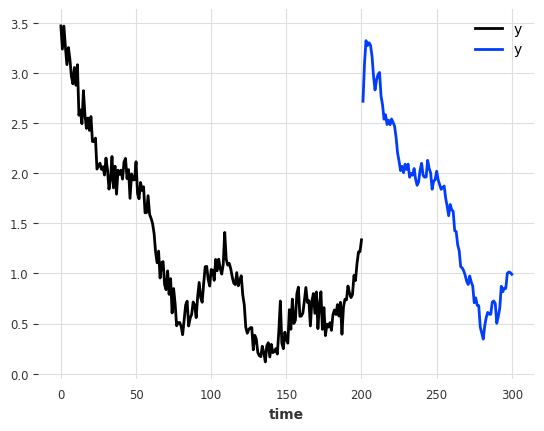

[6.994489042827002,
 4.035372380518097,
 4.351707402930337,
 2.186504830101331,
 2.234961522139806,
 3.3862788537887125,
 7.47389230059425,
 7.11820190832182,
 2.1365893442211705,
 6.827921471932011,
 5.785942460496289,
 5.720484106020119,
 3.215606513988017,
 6.650540820339195,
 4.473971097224495,
 5.446038972741024,
 4.010659436567276,
 5.606741171870436,
 3.9415570586415263,
 0.991709261990471]

In [60]:
expected_results = []
for asset in ASSETS:
    expected_results.append(get_expected_return_FFT(asset, True).first_value())

expected_results

In [62]:
expected_results = np.array(expected_results)
format_to_range(expected_results)

array([ 0.85208586, -0.06091417,  0.03668722, -0.63136013, -0.61640939,
       -0.26118421,  1.        ,  0.89025599, -0.64676095,  0.80069343,
        0.47920328,  0.45900689, -0.31384312,  0.74596475,  0.07441021,
        0.37433012, -0.06853905,  0.42391286, -0.08985977, -1.        ])